In [2]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [3]:
# !pip install torch==1.8.2+cpu torchvision==0.9.2+cpu torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [4]:
!pip install torch torchvision torchaudio

In [5]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [6]:
!cd yolov5 & pip install -r requirements.txt

In [7]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

In [8]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Shellen/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2021-11-26 torch 1.8.1+cu111 CPU



  0%|          | 0.00/14.0M [00:00<?, ?B/s]

Fusing layers... 


Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [9]:
# !pip uninstall opencv-python

In [10]:
# !pip install opencv-python

In [11]:
# !cd yolov5
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Shellen/.cache\torch\hub\master.zip
YOLOv5  2021-11-26 torch 1.8.1+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [12]:
img = os.path.join('yolov5','data', 'images', 'Cars1.png')

In [13]:
!cd yolov5
!dir

 Volume in drive C is OS
 Volume Serial Number is 601E-EF30

 Directory of C:\D\UT\Fourth Year\aps360\final

2021-11-26  02:58    <DIR>          .
2021-11-26  02:58    <DIR>          ..
2021-11-25  15:35    <DIR>          .ipynb_checkpoints
2021-11-25  16:22    <DIR>          360
2021-11-26  02:58            17,456 Car plate recognition.ipynb
2021-11-26  02:57               448 database.txt
2021-11-26  02:47             8,260 out.jpg
2021-11-26  01:50                52 test.py
2021-11-26  02:08               963 ui.py
2021-11-25  16:28    <DIR>          yolov5
               5 File(s)         27,179 bytes
               5 Dir(s)  228,113,350,656 bytes free


In [14]:
results = model(img)

In [15]:
results.print()

image 1/1: 248x400 1 plate
Speed: 35.9ms pre-process, 276.3ms inference, 2.0ms NMS per image at shape (1, 3, 416, 640)


In [16]:
labels, cord_thres = results.xyxyn[0][:, -1].numpy(), results.xyxyn[0][:, :-2].numpy()
print(cord_thres[0])
print(results.xyxy[0][:,:-2].numpy()[0])

[    0.34316     0.49559     0.64443     0.62422]
[     137.26      122.91      257.77      154.81]


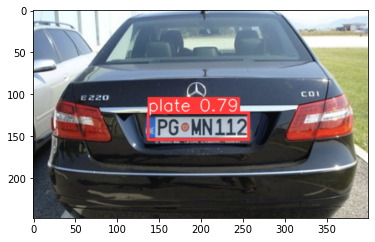

In [17]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [18]:
# Apply OCR

In [19]:
!pip install easyocr

In [20]:
import easyocr
from datetime import datetime

In [21]:
detection_threshold = 0.5

In [22]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [23]:
reader.readtext(img, detail = 0)

['Coi', 'ZCm', 'PGoMN112']

In [24]:
# crop img 
bounding_box = results.xyxy[0][:,:-2].numpy()[0]
print(bounding_box)
print(int(bounding_box[0]))
img = os.path.join('yolov5','data', 'images', 'Cars3.png')
test_img = cv2.imread(img)
crop_img = test_img[int(bounding_box[1]):int(bounding_box[3]),int(bounding_box[0]):int(bounding_box[2])]
#cv2.imshow('tets_img',test_img)
reader.readtext(crop_img, detail = 0)

[     137.26      122.91      257.77      154.81]
137


['DZI7 YXR']

In [25]:
vars(results)

{'imgs': [array([[[223, 243, 249],
          [228, 247, 252],
          [225, 244, 252],
          ...,
          [253, 255, 254],
          [253, 254, 253],
          [254, 255, 254]],
  
         [[224, 243, 249],
          [228, 247, 252],
          [225, 244, 251],
          ...,
          [253, 255, 254],
          [254, 255, 254],
          [254, 255, 255]],
  
         [[224, 244, 248],
          [228, 248, 251],
          [224, 244, 248],
          ...,
          [253, 255, 254],
          [254, 255, 254],
          [254, 255, 255]],
  
         ...,
  
         [[ 55,  62,  72],
          [ 67,  74,  84],
          [ 65,  71,  81],
          ...,
          [191, 186, 175],
          [197, 192, 182],
          [191, 186, 176]],
  
         [[ 57,  64,  74],
          [ 63,  69,  80],
          [ 67,  73,  84],
          ...,
          [181, 176, 166],
          [192, 187, 177],
          [200, 195, 184]],
  
         [[ 60,  67,  77],
          [ 70,  76,  86],
          [ 88, 

In [26]:
len(results.pred[0])

    

1

In [27]:
reader = easyocr.Reader(['en'])
cap = cv2.VideoCapture(0)
counter = 0
start = 1
last_pred = None
new_pred = None
compare = None
current = None
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results_f = model(frame)
    frame = np.squeeze(results_f.render())
    if (len(results_f.pred[0]) > 0):
        if results_f.pred[0][0][4] > 0.2:
            bounding_box = results_f.xyxy[0][:,:-2].numpy()[0]
            crop_img = frame[int(bounding_box[1]):int(bounding_box[3]),int(bounding_box[0]):int(bounding_box[2])]
            new_pred = reader.readtext(crop_img, detail = 0)
#             print(new_pred)
            if new_pred == last_pred:
                counter += 1
            if new_pred != last_pred:
                counter = 0
                print("Not Same")
            if counter >= 2 and compare != new_pred:
                compare = new_pred
                print("Found One ", end = '')
                print(new_pred)
                f = open("database.txt", "a")
                now = datetime.now() # current date and time
                date = now.strftime("\n%m/%d/%Y,")
                time = now.strftime("%H:%M:%S,")
                f.write(date)
                f.write(time)
                f.write(new_pred[0])
                f.write(",")
                f.close()
                current = new_pred
                
    font                   = cv2.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText = (10,50)
    fontScale              = 1
    fontColor              = (255,255,255)
    thickness              = 2
    lineType               = 2
    if current == None:
        current = ['NONE']
    cv2.putText( frame,current[0], 
        bottomLeftCornerOfText, 
        font, 
        fontScale,
        fontColor,
        thickness,
        lineType)
    last_pred = new_pred
    cv2.imshow('YOLO', frame)
    #cv2.imshow(frame)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


from PyQt5.QtWidgets import *
from PyQt5.QtCore import *

headers = ["Date", "Time", "License Plate Number"]


class TableModel(QAbstractTableModel):
    def rowCount(self, parent):
        return len(pre_row)
    def columnCount(self, parent):
        return len(headers)
    def data(self, index, role):
        if role != Qt.DisplayRole:
            return QVariant()
        return pre_row[index.row()][index.column()]
    def headerData(self, section, orientation, role):
        if role != Qt.DisplayRole or orientation != Qt.Horizontal:
            return QVariant()
        return headers[section]


file1 = open('database.txt', 'r')
Lines = file1.readlines()
pre_row = [] 
count = 0
# Strips the newline character
for line in Lines:
    count += 1
    pre_row.append(tuple(map(str, line.split(','))))
    

app = QApplication([])
model1 = TableModel()
view = QTableView()
view.setModel(model1)
view.show()
app.exec_()

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Not Same
Not Same
Found One ['B 58 BPS']
Not Same
Not Same
Not Same
Not Same
Not Same
Not Same
Found One ['BHHU Z1']
Not Same
Not Same
Not Same
Not Same
Not Same
Not Same
Not Same
Found One ['B 58 BPS']


0

In [ ]:
f = open("database.txt", "w")
f.write("Woops! I have deleted the content!\n")
f.write("Woops! I have deleted the content!")
f.close()

In [ ]:
from datetime import datetime


In [ ]:
f = open("database.txt", "a")
now = datetime.now() # current date and time


date = now.strftime("%m/%d/%Y,")
time = now.strftime("%H:%M:%S,")
f.write(date)
f.write(time)
f.close()

In [ ]:
file1 = open('database.txt', 'r')
Lines = file1.readlines()
pre_row = [] 
count = 0
# Strips the newline character
for line in Lines:
    count += 1
    pre_row.append(tuple(map(str, line.split(','))))
#     print("Line{}: {}".format(count, line.strip()))
# test_str = "1, -5, 4, 6, 7"
  
# # printing original string 
# print("The original string : " + str(test_str))
  
# # Convert String to Tuple
# # using map() + tuple() + int + split()
# res = tuple(map(int, test_str.split(', ')))
  
# # printing result
# print("Tuple after getting conversion from String : " + str(res))

In [ ]:
pre_row

In [ ]:
pip install pyqt5

In [ ]:
from PyQt5.QtWidgets import *
from PyQt5.QtCore import *

headers = ["Date", "Time", "License Plate Number"]


class TableModel(QAbstractTableModel):
    def rowCount(self, parent):
        return len(pre_row)
    def columnCount(self, parent):
        return len(headers)
    def data(self, index, role):
        if role != Qt.DisplayRole:
            return QVariant()
        return pre_row[index.row()][index.column()]
    def headerData(self, section, orientation, role):
        if role != Qt.DisplayRole or orientation != Qt.Horizontal:
            return QVariant()
        return headers[section]

app = QApplication([])
model = TableModel()
view = QTableView()
view.setModel(model)
view.show()
app.exec_()

In [ ]:
print(type(rows[0]))

In [ ]:
from PyQt5.QtWidgets import *
from PyQt5.QtCore import *

headers = ["Scientist name", "Birthdate", "Contribution"]
rows = [("Newton", "1643-01-04", "Classical mechanics"),
        ("Einstein", "1879-03-14", "Relativity"),
        ("Darwin", "1809-02-12", "Evolution")]

class TableModel(QAbstractTableModel):
    def rowCount(self, parent):
        return len(rows)
    def columnCount(self, parent):
        return len(headers)
    def data(self, index, role):
        if role != Qt.DisplayRole:
            return QVariant()
        return rows[index.row()][index.column()]
    def headerData(self, section, orientation, role):
        if role != Qt.DisplayRole or orientation != Qt.Horizontal:
            return QVariant()
        return headers[section]

app = QApplication([])
model = TableModel()
view = QTableView()
view.setModel(model)
view.show()
app.exec_()

In [ ]:
import numpy as np
import cv2

# Create a black image
img = np.zeros((512,512,3), np.uint8)

# Write some Text

font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (10,100)
fontScale              = 1
fontColor              = (255,255,255)
thickness              = 1
lineType               = 2

cv2.putText(img,'Hello World!', 
    bottomLeftCornerOfText, 
    font, 
    fontScale,
    fontColor,
    thickness,
    lineType)

#Display the image
cv2.imshow("img",img)

#Save image
cv2.imwrite("out.jpg", img)

cv2.waitKey(0)